In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [19]:
Nclass = 500
D = 2
M = 3
K = 3

In [31]:
X1 = np.random.randn(Nclass,D)+np.array([0,-2])
X2 = np.random.randn(Nclass,D)+np.array([2,2])
X3 = np.random.randn(Nclass,D)+np.array([-2,2])
X = np.vstack([X1,X2,X3]).astype(np.float32)
Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)


(1500, 2)
(1500,)


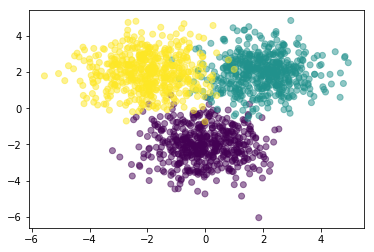

In [33]:
print(X.shape)
print(Y.shape)
plt.scatter(X[:,0],X[:,1], c=Y,alpha=0.5)
plt.show()

In [44]:
N = len(Y)
print("Length of Y: ", N)
T = np.zeros([N,K])
print(T.shape)

('Length of Y: ', 1500)
(1500, 3)


In [53]:
for i in range(N):
    T[i, Y[i]] = 1
    

In [54]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))


def forward(X, W1, b1, W2, b2):
    Z = tf.nn.sigmoid(tf.matmul(X, W1) + b1)
    return tf.matmul(Z, W2) + b2

In [55]:
tfX = tf.placeholder(tf.float32, [None, D])
tfY = tf.placeholder(tf.float32, [None, K])

In [56]:
W1 = init_weights([D, M]) # create symbolic variables
b1 = init_weights([M])
W2 = init_weights([M, K])
b2 = init_weights([K])

In [57]:
logits = forward(tfX, W1, b1, W2, b2)

In [59]:
cost = tf.reduce_mean(
  tf.nn.softmax_cross_entropy_with_logits(
    labels=tfY,
    logits=logits
  ))

In [64]:
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost) # construct an optimizer
# input parameter is the learning rate

predict_op = tf.argmax(logits, 1)
# input parameter is the axis on which to choose the max

# just stuff that has to be done
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [66]:
for i in range(1000):
    sess.run(train_op, feed_dict={tfX: X, tfY: T})
    pred = sess.run(predict_op, feed_dict={tfX: X, tfY: T})
    if i % 100 == 0:
        print("Accuracy:", np.mean(Y == pred))

('Accuracy:', 0.97066666666666668)
('Accuracy:', 0.97066666666666668)
('Accuracy:', 0.97066666666666668)
('Accuracy:', 0.96999999999999997)
('Accuracy:', 0.96999999999999997)
('Accuracy:', 0.96999999999999997)
('Accuracy:', 0.96999999999999997)
('Accuracy:', 0.96999999999999997)
('Accuracy:', 0.96999999999999997)
('Accuracy:', 0.96999999999999997)
